In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
sleep_df = pd.read_pickle("sleep_dataframe.pkl")
tread_df = pd.read_pickle("treadmill_ex_dataframe.pkl")
run_df   = pd.read_pickle("running_ex_dataframe.pkl")
walk_df  = pd.read_pickle("walking_ex_dataframe.pkl")

weight_df = pd.read_pickle("weight_ex_dataframe.pkl")

In [3]:
def check_df_concat_capa():
    tread_col = [x for x in tread_df.columns]
    run_col   = [x for x in run_df.columns]
    walk_col  = [x for x in walk_df.columns]

    print ("Cols in Tread not in Run --> ", set(tread_col) - set(run_col))
    print ("Cols in Tread not in Walk --> ", set(tread_col) - set(walk_col))
    print ("Cols in Run not in Tread --> ", set(run_col) - set(tread_col))
    print ("Cols in Walk not in Tread --> ", set(walk_col) - set(tread_col))
    print ("Cols in Run not in Walk --> ", set(run_col) - set(walk_col))
    print ("Cols in Walk not in Run --> ", set(walk_col) - set(run_col))


In [4]:
check_df_concat_capa()
## Add milestone and time to run
run_df.insert(loc=len(run_df.columns), column="milestone", value=0)
run_df.insert(loc=len(run_df.columns), column="milestone_time", value=0)

## Walk and Run have the same atributes. So add milestone and time to walk as well.
walk_df.insert(loc=len(walk_df.columns), column="milestone", value=0)
walk_df.insert(loc=len(walk_df.columns), column="milestone_time", value=0)

## Add altitude related columns and remove comment
tread_df.insert(loc=len(tread_df.columns), column="altitude_gain", value = 0)
tread_df.insert(loc=len(tread_df.columns), column="altitude_loss", value = 0)
tread_df.insert(loc=len(tread_df.columns), column="max_altitude", value = 0)
tread_df.insert(loc=len(tread_df.columns), column="min_altitude", value = 0)
tread_df.drop(columns="comment", inplace=True)

Cols in Tread not in Run -->  {'milestone', 'comment', 'milestone_time'}
Cols in Tread not in Walk -->  {'milestone', 'comment', 'milestone_time'}
Cols in Run not in Tread -->  {'min_altitude', 'max_altitude', 'altitude_gain', 'altitude_loss'}
Cols in Walk not in Tread -->  {'min_altitude', 'max_altitude', 'altitude_gain', 'altitude_loss'}
Cols in Run not in Walk -->  set()
Cols in Walk not in Run -->  set()


In [5]:
check_df_concat_capa()

Cols in Tread not in Run -->  set()
Cols in Tread not in Walk -->  set()
Cols in Run not in Tread -->  set()
Cols in Walk not in Tread -->  set()
Cols in Run not in Walk -->  set()
Cols in Walk not in Run -->  set()


In [6]:
print ("Records in Treadmill  --> %d" %(len(tread_df)))
print ("Records in Walk       --> %d" %(len(walk_df)))
print ("Records in Run        --> %d" %(len(run_df)))

frames = [tread_df, walk_df, run_df]
atheletics_df = pd.concat(frames, sort=True)

print ("Records in Atheletics --> %d" %(len(atheletics_df)))
atheletics_df.columns

Records in Treadmill  --> 140
Records in Walk       --> 185
Records in Run        --> 86
Records in Atheletics --> 411


Index(['altitude_gain', 'altitude_loss', 'calorie', 'decline_distance',
       'distance', 'duration', 'exercise_type', 'incline_distance',
       'live_data', 'location_data', 'max_altitude', 'max_heart_rate',
       'max_speed', 'mean_heart_rate', 'mean_speed', 'milestone',
       'milestone_time', 'min_altitude', 'min_heart_rate', 'start_time'],
      dtype='object')

In [7]:
atheletics_df.head(10)

,altitude_gain,altitude_loss,calorie,decline_distance,distance,duration,exercise_type,incline_distance,live_data,location_data,max_altitude,max_heart_rate,max_speed,mean_heart_rate,mean_speed,milestone,milestone_time,min_altitude,min_heart_rate,start_time
8,0.0,0.0,514.800000,0.0,6400.0,2080619,15005,0.0,023d2fc0-d81c-a6ab-e5f8-d9cfb8d696f6.live_data...,023d2fc0-d81c-a6ab-e5f8-d9cfb8d696f6.location_...,0.0,208.000000,NA,179.000000,3.076008,0.0,0.0,0.0,131.000000,2017-10-17 13:43:35.503
15,0.0,0.0,312.000000,0.0,5400.0,2290000,15005,0.0,NA,NA,0.0,206.000000,NA,163.000000,2.358079,0.0,0.0,0.0,100.000000,2016-10-17 12:48:00.000
24,0.0,0.0,88.050000,0.0,1500.0,523495,15005,0.0,069ec983-8633-fb3d-e923-ad652c51e6e2.live_data...,069ec983-8633-fb3d-e923-ad652c51e6e2.location_...,0.0,197.000000,NA,149.000000,2.865357,0.0,0.0,0.0,109.000000,2018-06-21 14:12:17.159
29,0.0,0.0,202.080000,0.0,2850.0,1099166,15005,0.0,06c5c502-83b5-4d93-e96a-4074e896dfaa.live_data...,06c5c502-83b5-4d93-e96a-4074e896dfaa.location_...,0.0,187.000000,NA,160.000000,2.592875,0.0,0.0,0.0,116.000000,2018-06-18 13:45:13.729
39,0.0,0.0,829.880000,0.0,10900.0,4279794,15005,0.0,09d39140-9d75-92b2-1ffe-601d9dc3de74.live_data...,09d39140-9d75-92b2-1ffe-601d9dc3de74.location_...,0.0,181.500000,NA,153.500000,2.546852,10000.0,3601000.0,0.0,85.000000,2018-08-16 12:48:27.139
43,0.0,0.0,218.480000,0.0,3300.0,1205939,15005,0.0,0ac758a7-3d1d-cafb-c51e-d0126c5f0eaa.live_data...,0ac758a7-3d1d-cafb-c51e-d0126c5f0eaa.location_...,0.0,172.888889,NA,150.777778,2.736457,0.0,0.0,0.0,97.777778,2018-02-27 15:58:29.327
50,0.0,0.0,789.580000,0.0,12000.0,4223663,15005,0.0,0d37b20e-764d-fb8d-7451-51cfb53d364a.live_data...,0d37b20e-764d-fb8d-7451-51cfb53d364a.location_...,0.0,178.000000,NA,158.000000,2.841136,10000.0,3608000.0,0.0,99.000000,2018-08-30 13:24:51.848
54,0.0,0.0,95.340004,0.0,1500.0,471929,15005,0.0,0e628080-a19c-07f9-3736-5d8785b9000b.live_data...,0e628080-a19c-07f9-3736-5d8785b9000b.location_...,0.0,205.000000,NA,189.000000,3.178444,0.0,0.0,0.0,173.000000,2017-10-18 12:35:23.741
55,0.0,0.0,390.590000,0.0,5500.0,2145250,15005,0.0,0e63ce4b-c8ed-3a81-adb4-4d1b1b70f2d0.live_data...,0e63ce4b-c8ed-3a81-adb4-4d1b1b70f2d0.location_...,0.0,220.000000,NA,176.000000,2.563804,0.0,0.0,0.0,112.000000,2018-07-02 14:12:51.933
66,0.0,0.0,250.320000,0.0,3450.0,1311289,15005,0.0,10a5d012-6042-39eb-1df8-04ff22c10e51.live_data...,10a5d012-6042-39eb-1df8-04ff22c10e51.location_...,0.0,151.500000,NA,123.500000,2.630999,0.0,0.0,0.0,96.500000,2018-05-15 12:39:59.057


In [8]:
def heart_zone_calc (heart_rate_type, row_value):
    hrmax=220-37
    hr = row_value[heart_rate_type]
    if (hr < hrmax*0.7):
        return "Light HR"
    elif (hr < hrmax*0.8):
        return "Moderate HR"
    elif (hr < hrmax*0.9):
        return "Hard HR"
    else:
        return "Maximum HR"

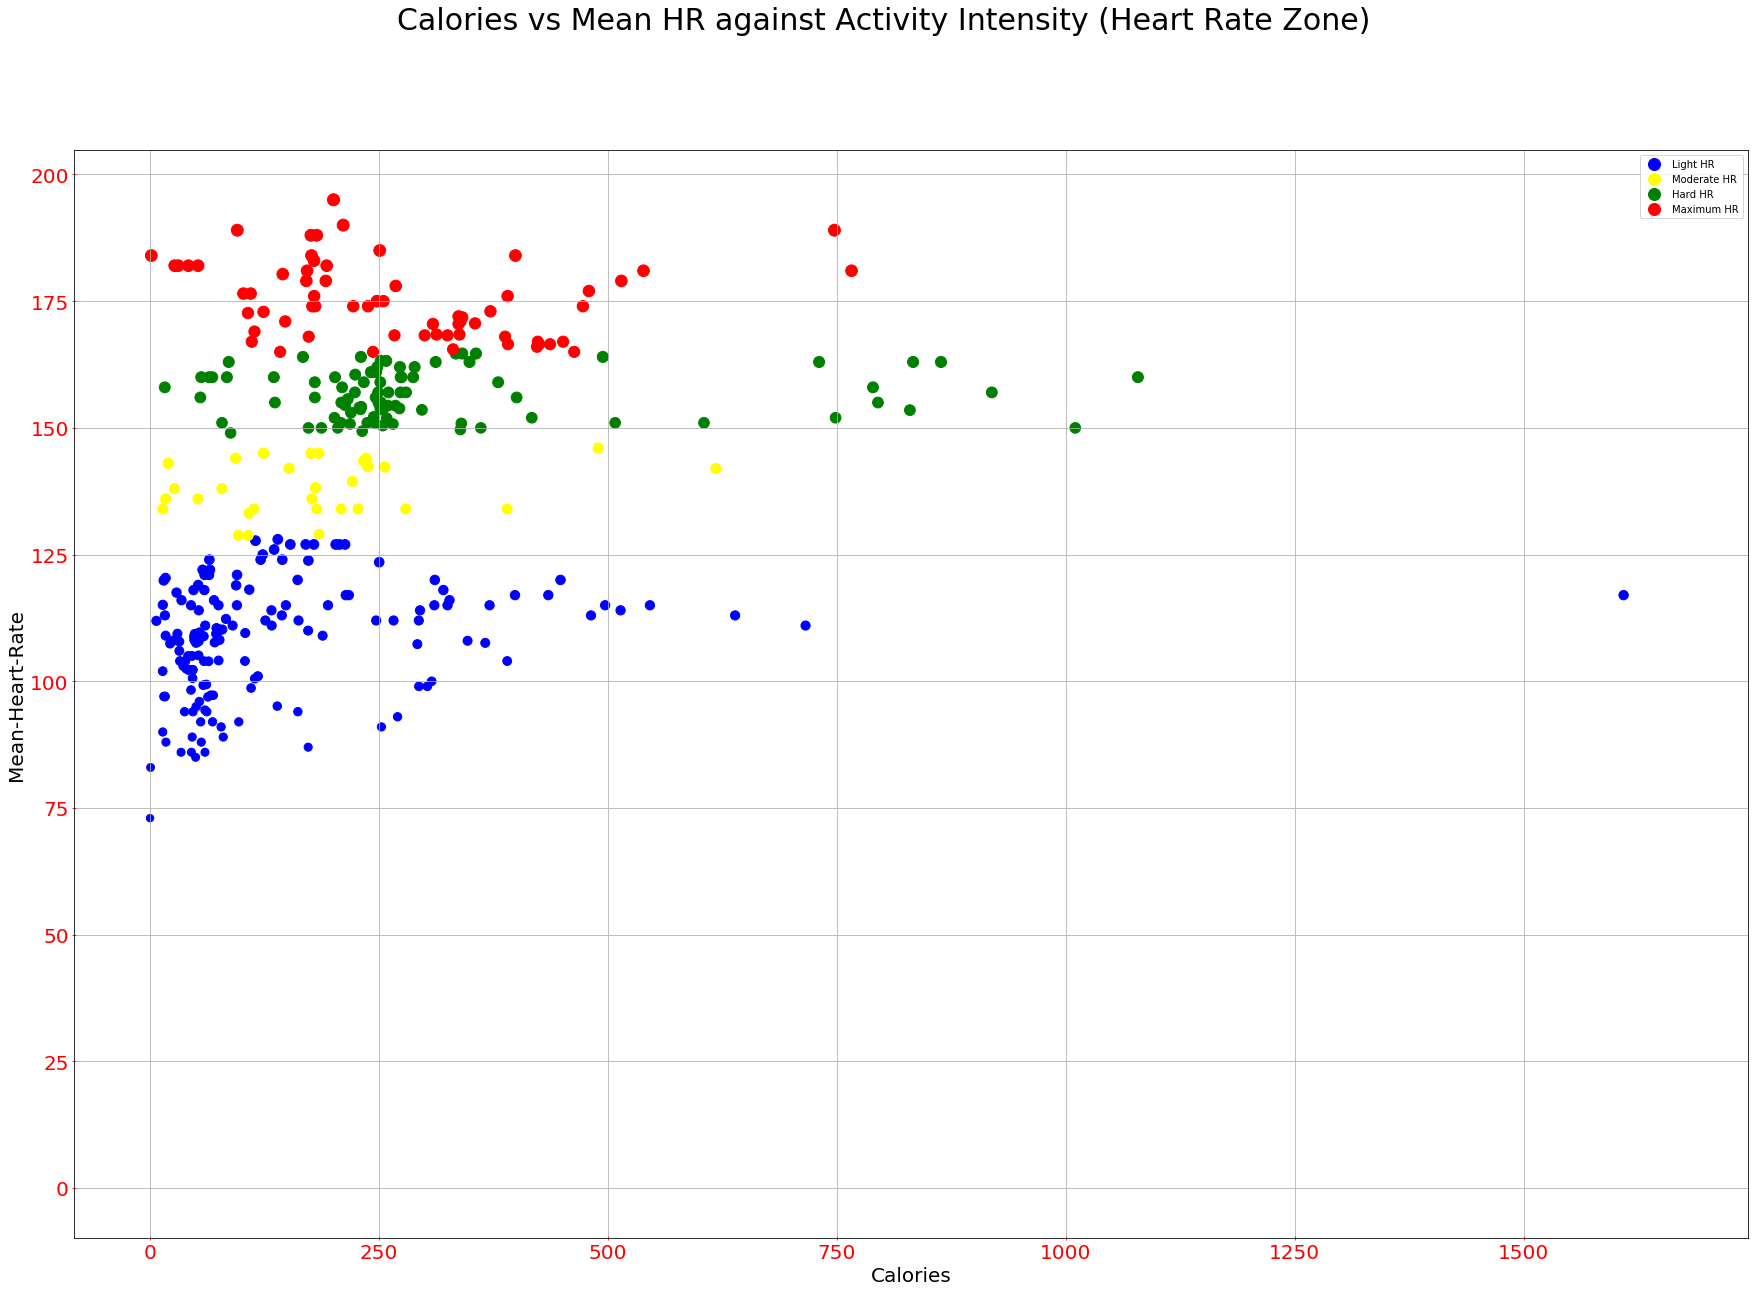

In [9]:
hr_cal = atheletics_df[["exercise_type", "mean_heart_rate", "calorie"]]

# Add heart zones
# Veyr Light -- Heart rate zone 1: 50–60% of HRmax
# Light -- Heart rate zone 2: 60–70% of HRmax
# Moderate -- Heart rate zone 3: 70–80% of HRmax
# Hard -- Heart rate zone 4: 80–90% of HRmax
# Maximum -- Heart rate zone 5: 90–100% of HRmax
# HRmax = 220-Age = 220-37 = 183


hr_cal.insert(loc=len(hr_cal.columns), column="heart_zone", value="")
hz_col = hr_cal.apply(lambda row_val: heart_zone_calc("mean_heart_rate", row_val), axis=1)
hr_cal = hr_cal.assign(heart_zone=hz_col.values)

colour_chart = {"Light HR": "blue", "Moderate HR": "yellow", "Hard HR": "green", "Maximum HR": "red"}

fig, ax = plt.subplots(figsize=(30, 20))
ax.scatter(x=hr_cal["calorie"], 
           y=hr_cal["mean_heart_rate"], 
           s=hr_cal["mean_heart_rate"] * .75,
           marker="o", 
           c=hr_cal["heart_zone"].apply(lambda hz_val: colour_chart[hz_val]))

ax.set_xlabel("Calories", fontsize=20)
ax.set_ylabel("Mean-Heart-Rate", fontsize=20)
fig.suptitle("Calories vs Mean HR against Activity Intensity (Heart Rate Zone)", fontsize=30)

plt.tick_params(axis="both", labelsize=20, direction="inout", colors="r")
plt.grid(b=True, which="both", axis="both")

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='', markersize=12) 
           for color in colour_chart.values()]
plt.legend(markers, colour_chart.keys(), numpoints=1)
    
plt.show()

In [10]:
## Constants based on the exercise type
ex_type_walking   = 1001
ex_type_running   = 1002
ex_type_treadmill = 15005

def ex_name (row_value):
    if (row_value["exercise_type"] == ex_type_treadmill):
        return "Treadmill"
    elif (row_value["exercise_type"] == ex_type_walking):
        return "Walking"
    elif (row_value["exercise_type"] == ex_type_running):
        return "Running"
    else:
        return "Undefined"

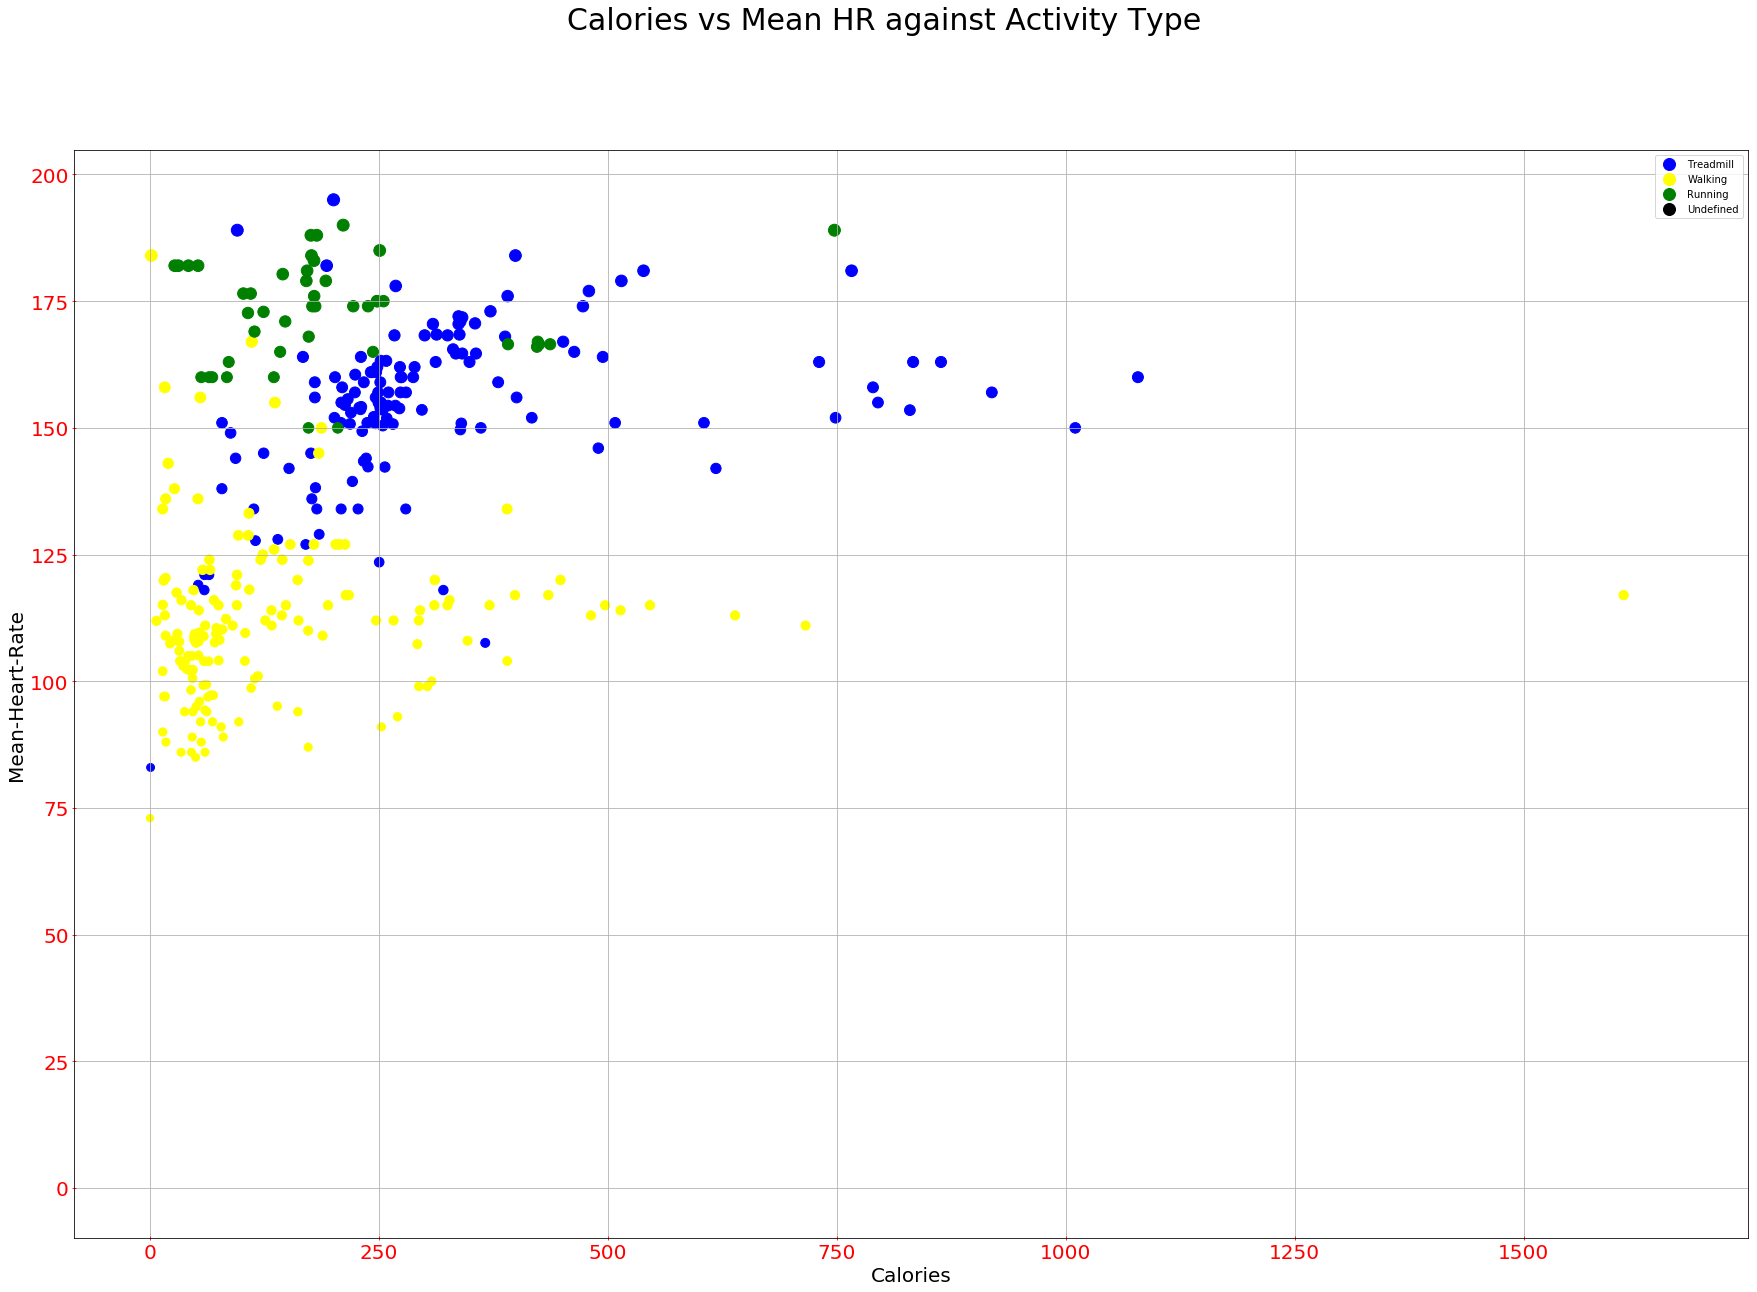

In [11]:
hr_cal.insert(loc=len(hr_cal.columns), column="ex_name", value="")
hz_col = hr_cal.apply(lambda row_val: ex_name(row_val), axis=1)
hr_cal = hr_cal.assign(ex_name=hz_col.values)

colour_chart = {"Treadmill": "blue", "Walking": "yellow", "Running": "green", "Undefined": "black"}

fig, ax = plt.subplots(figsize=(30, 20))
ax.scatter(x=hr_cal["calorie"], 
           y=hr_cal["mean_heart_rate"], 
           s=hr_cal["mean_heart_rate"] * .75,
           marker="o", 
           c=hr_cal["ex_name"].apply(lambda hz_val: colour_chart[hz_val]))

ax.set_xlabel("Calories", fontsize=20)
ax.set_ylabel("Mean-Heart-Rate", fontsize=20)
fig.suptitle("Calories vs Mean HR against Activity Type", fontsize=30)

plt.tick_params(axis="both", labelsize=20, direction="inout", colors="r")
plt.grid(b=True, which="both", axis="both")

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='', markersize=12) 
           for color in colour_chart.values()]
plt.legend(markers, colour_chart.keys(), numpoints=1)
    
plt.show()

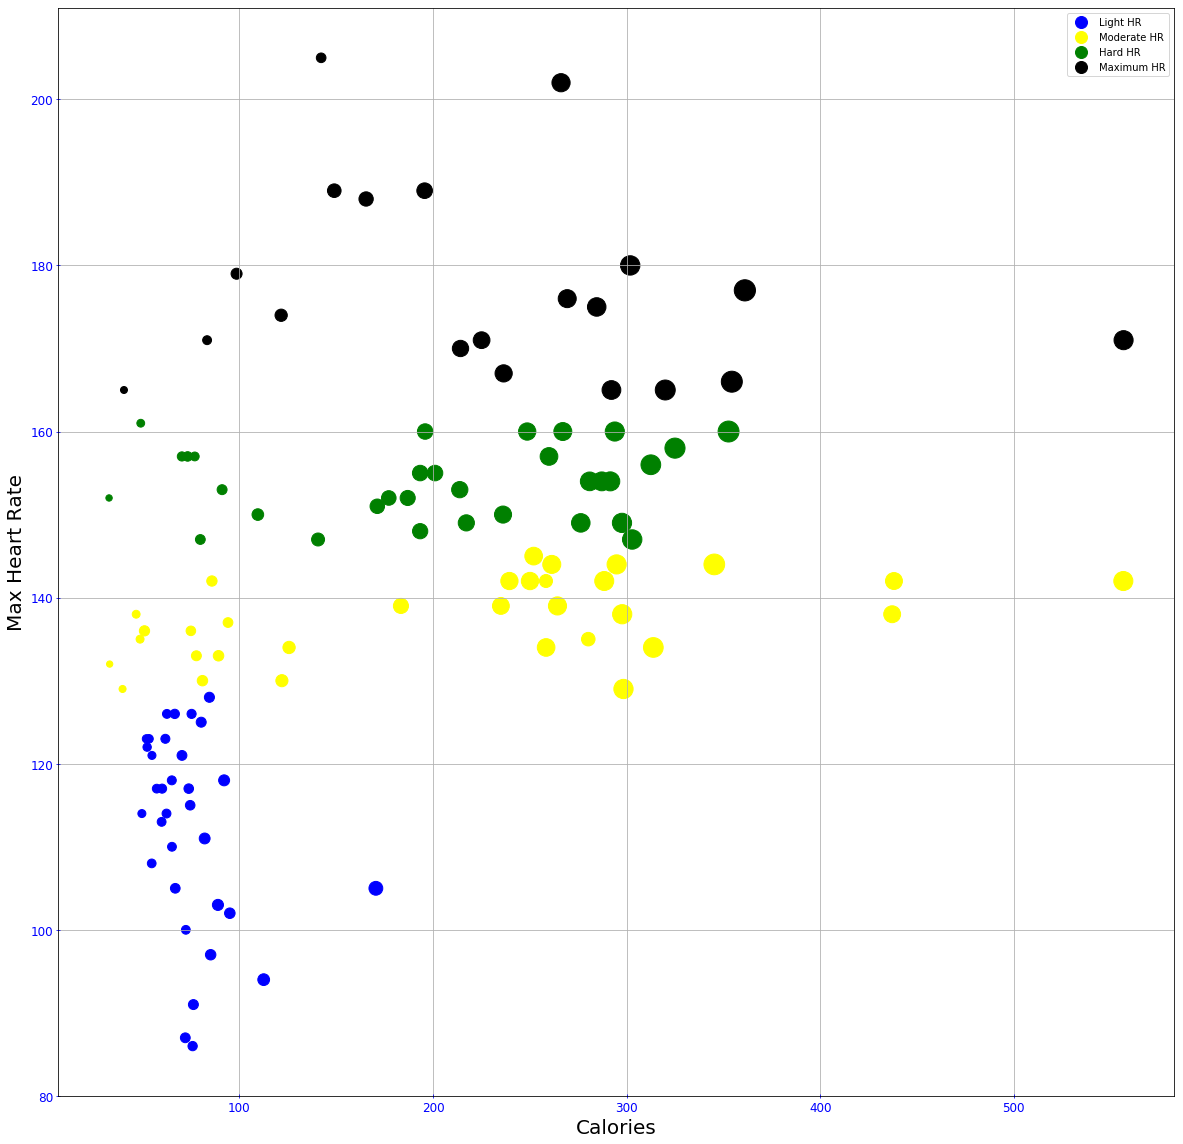

In [12]:
weight_df.columns
wt_cal = weight_df[["calorie", "max_heart_rate", "mean_heart_rate", "duration"]]
wt_cal = wt_cal[wt_cal["max_heart_rate"] > 0]

wt_cal.insert(loc=len(wt_cal.columns), column="heart_zone", value="")
wt_col = wt_cal.apply(lambda row_val: heart_zone_calc("max_heart_rate", row_val), axis=1)
wt_cal = wt_cal.assign(heart_zone=wt_col.values)

colour_chart = {"Light HR": "blue", "Moderate HR": "yellow", "Hard HR": "green", "Maximum HR": "black"}

fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(x=wt_cal["calorie"],
           y=wt_cal["max_heart_rate"],
           s=wt_cal["duration"] * 0.0001,
           marker="o",
           c=wt_cal["heart_zone"].apply(lambda hz_val: colour_chart[hz_val]))

ax.set_xlabel("Calories", fontsize=20)
ax.set_ylabel("Max Heart Rate", fontsize=20)
#fig.suptitle("Calories vs Mean Heart Rate against duration", fontsize=30)

plt.tick_params(axis="both", labelsize=12, direction="inout", colors="b")

markers = [plt.Line2D([0,0],[0,0], color=color, marker="o", linestyle="", markersize=12) 
           for color in colour_chart.values()]

plt.legend(markers, colour_chart.keys(), numpoints=1)

plt.grid(b=True, axis="both", which="major")
plt.show()

In [13]:
sleep_df.columns

Index(['sleep_uuid', 'efficiency', 'has_sleep_data', 'sleep_time_offset',
       'sleep_end_time', 'quality', 'sleep_start_time', 'sleep_status',
       'motionless_sleep_duration', 'light_sleep_duration',
       'restless_duration'],
      dtype='object')

In [14]:
sleep_dur_col = pd.to_datetime(sleep_df["sleep_end_time"]) - pd.to_datetime(sleep_df["sleep_start_time"])
sleep_df[["sleep_end_time", "sleep_start_time"]].head(5)

,sleep_end_time,sleep_start_time
0,2017-05-09 05:40:00+03:00,2017-05-08 22:30:00+03:00
1,2018-06-22 07:32:00+03:00,2018-06-22 06:31:00+03:00
2,2017-08-02 07:14:00+03:00,2017-08-02 02:41:00+03:00
3,2017-11-27 06:09:00+02:00,2017-11-27 00:44:00+02:00
4,2017-06-01 05:50:00+03:00,2017-05-31 22:20:00+03:00


In [15]:
sleep_dur_col.dtype

dtype('<m8[ns]')

In [16]:
sleep_dur_col = sleep_dur_col.dt.seconds*1000 ## Everything is in milliseconds

In [17]:
sleep_data = sleep_df.copy()
sleep_data = sleep_data.assign(total_duration=sleep_dur_col.values)

In [18]:
sleep_data.columns

Index(['sleep_uuid', 'efficiency', 'has_sleep_data', 'sleep_time_offset',
       'sleep_end_time', 'quality', 'sleep_start_time', 'sleep_status',
       'motionless_sleep_duration', 'light_sleep_duration',
       'restless_duration', 'total_duration'],
      dtype='object')

In [19]:
atheletics_sleep = atheletics_df.copy()

In [20]:
atheletics_sleep.drop(columns=["altitude_gain", "altitude_loss", "decline_distance", "incline_distance",
                               "live_data", "max_altitude", "min_altitude"], inplace=True)
atheletics_sleep.columns

Index(['calorie', 'distance', 'duration', 'exercise_type', 'location_data',
       'max_heart_rate', 'max_speed', 'mean_heart_rate', 'mean_speed',
       'milestone', 'milestone_time', 'min_heart_rate', 'start_time'],
      dtype='object')

In [21]:
prev_day_col = pd.to_datetime(atheletics_sleep["start_time"]) - pd.Timedelta("1 day")
prev_day_col.head(5)
prev_day_col.dt.date.head(5)

8     2017-10-16
15    2016-10-16
24    2018-06-20
29    2018-06-17
39    2018-08-15
Name: start_time, dtype: object

In [22]:
atheletics_sleep.insert(loc=(len(atheletics_sleep.columns)), column="prev_motionless_sleep_duration", value=0.0)
atheletics_sleep.insert(loc=(len(atheletics_sleep.columns)), column="prev_total_sleep_duration", value=0.0)
atheletics_sleep.insert(loc=(len(atheletics_sleep.columns)), column="prev_sleep_efficiency", value=0.0)
atheletics_sleep.insert(loc=len(atheletics_sleep.columns), column="heart_zone", value=0.0)

In [23]:
print(sleep_data.columns)
sleep_data.sort_values(by=["sleep_start_time"], ascending=True, inplace=True)
print_next = False

for ind, row in sleep_data.iterrows():
    print (row, end="\n\n")

Index(['sleep_uuid', 'efficiency', 'has_sleep_data', 'sleep_time_offset',
       'sleep_end_time', 'quality', 'sleep_start_time', 'sleep_status',
       'motionless_sleep_duration', 'light_sleep_duration',
       'restless_duration', 'total_duration'],
      dtype='object')
sleep_uuid                   91d4823e-90be-4c7a-8370-8961697a4c3d
efficiency                                                      0
has_sleep_data                                                NaN
sleep_time_offset                                        UTC+0300
sleep_end_time                          2017-02-27 05:30:00+02:00
quality                                                     50004
sleep_start_time                        2017-02-26 23:00:00+02:00
sleep_status                                                 None
motionless_sleep_duration                                       0
light_sleep_duration                                            0
restless_duration                                               0

sleep_uuid                   12bca0be-def7-4223-b225-8bcd9855a646
efficiency                                                      0
has_sleep_data                                                NaN
sleep_time_offset                                        UTC+0300
sleep_end_time                          2017-11-15 03:30:00+02:00
quality                                                     50003
sleep_start_time                        2017-11-14 22:40:00+02:00
sleep_status                                                 None
motionless_sleep_duration                                       0
light_sleep_duration                                            0
restless_duration                                               0
total_duration                                           17400000
Name: 58, dtype: object

sleep_uuid                                a714f1f8-aff3-de1c-13b1-8fb93d9bd330
efficiency                                                             82.5581
has_sleep_data           

In [24]:
# Sleep patterns before atheletics

## Sleep records are sorted in ascending order of sleep start time.
## If sleep time is less than 4hrs in one record, check two cases for combining data:
## First check if the difference between sleep start time in current record and 
## sleep end time on last record is less than 30mins
## Then check if the difference between sleep end time in this record and 
## sleep start time in next record is less than 30mins

for ind, row in atheletics_sleep.iterrows():
    check_next = now_break = False
    prev_day  = (pd.to_datetime(row["start_time"]) - pd.Timedelta("1 day")).date()
    for dni, wor in sleep_data.iterrows():

        ## Next record checking for combining data
        if (check_next):
            corrected = False
            nxt_sleep_start_dt = pd.to_datetime(wor["sleep_start_time"])
            diff = nxt_sleep_start_dt - curr_sleep_end_dt
            if (diff.seconds < 1800): ## Difference between sleep times is less than 30minutes, then combine the duration
                atheletics_sleep.loc[ind, "prev_motionless_sleep_duration"] += sleep_data.loc[dni, "motionless_sleep_duration"]
                atheletics_sleep.loc[ind, "prev_total_sleep_duration"]      += sleep_data.loc[dni, "total_duration"]
                eff = (atheletics_sleep.loc[ind, "prev_sleep_efficiency"] + sleep_data.loc[dni, "efficiency"]) / 2
                atheletics_sleep.loc[ind, "prev_sleep_efficiency"]          = eff
                corrected = True
            check_next = False
            now_break = True
        
        sleep_day = (pd.to_datetime(wor["sleep_start_time"])).date()
        if (prev_day == sleep_day):
            atheletics_sleep.loc[ind, "prev_motionless_sleep_duration"] = sleep_data.loc[dni, "motionless_sleep_duration"]
            atheletics_sleep.loc[ind, "prev_total_sleep_duration"]      = sleep_data.loc[dni, "total_duration"]
            atheletics_sleep.loc[ind, "prev_sleep_efficiency"]          = sleep_data.loc[dni, "efficiency"]
            
            if (sleep_data.loc[dni, "total_duration"]/60000 < 240):
                check_next = True
                now_break = False
                curr_sleep_end_dt = pd.to_datetime(wor["sleep_end_time"])
                
                ## Previous record checking for combining data
                if (dni-1 >= 0):
                    curr_sleep_start_dt = pd.to_datetime(wor["sleep_start_time"])
                    prev_sleep_end_dt = pd.to_datetime(sleep_data.loc[dni-1, "sleep_end_time"])
                    diff = curr_sleep_start_dt - prev_sleep_end_dt
                    if (diff.seconds < 1800): ## Difference between sleep times is less than 30minutes, then combine the duration
                        atheletics_sleep.loc[ind, "prev_motionless_sleep_duration"] += sleep_data.loc[dni-1, "motionless_sleep_duration"]
                        atheletics_sleep.loc[ind, "prev_total_sleep_duration"]      += sleep_data.loc[dni-1, "total_duration"]
                        eff = (atheletics_sleep.loc[ind, "prev_sleep_efficiency"] + sleep_data.loc[dni, "efficiency"]) / 2
                        atheletics_sleep.loc[ind, "prev_sleep_efficiency"]          = eff
            
        if (now_break):
            break

## Add heart Zone column
hz_col = atheletics_sleep.apply(lambda row_val: heart_zone_calc("mean_heart_rate", row_val), axis=1)
atheletics_sleep = atheletics_sleep.assign(heart_zone = hz_col.values)
            
## Add Exercise name column
atheletics_sleep.insert(loc=len(atheletics_sleep.columns), column="ex_name", value="")
ex_col = atheletics_sleep.apply(lambda row_val: ex_name(row_val), axis=1)
atheletics_sleep = atheletics_sleep.assign(ex_name=ex_col.values)

atheletics_sleep.head(5)

,calorie,distance,duration,exercise_type,location_data,max_heart_rate,max_speed,mean_heart_rate,mean_speed,milestone,milestone_time,min_heart_rate,start_time,prev_motionless_sleep_duration,prev_total_sleep_duration,prev_sleep_efficiency,heart_zone,ex_name
8,514.80,6400.0,2080619,15005,023d2fc0-d81c-a6ab-e5f8-d9cfb8d696f6.location_...,208.0,NA,179.0,3.076008,0.0,0.0,131.0,2017-10-17 13:43:35.503,10200000.0,27900000.0,88.423645,Maximum HR,Treadmill
15,312.00,5400.0,2290000,15005,NA,206.0,NA,163.0,2.358079,0.0,0.0,100.0,2016-10-17 12:48:00.000,0.0,0.0,0.000000,Hard HR,Treadmill
24,88.05,1500.0,523495,15005,069ec983-8633-fb3d-e923-ad652c51e6e2.location_...,197.0,NA,149.0,2.865357,0.0,0.0,109.0,2018-06-21 14:12:17.159,15000000.0,25800000.0,91.879350,Hard HR,Treadmill
29,202.08,2850.0,1099166,15005,06c5c502-83b5-4d93-e96a-4074e896dfaa.location_...,187.0,NA,160.0,2.592875,0.0,0.0,116.0,2018-06-18 13:45:13.729,0.0,29400000.0,0.000000,Hard HR,Treadmill
39,829.88,10900.0,4279794,15005,09d39140-9d75-92b2-1ffe-601d9dc3de74.location_...,181.5,NA,153.5,2.546852,10000.0,3601000.0,85.0,2018-08-16 12:48:27.139,15000000.0,26280000.0,93.621864,Hard HR,Treadmill


In [25]:
sorted(atheletics_sleep["heart_zone"].unique())

['Hard HR', 'Light HR', 'Maximum HR', 'Moderate HR']

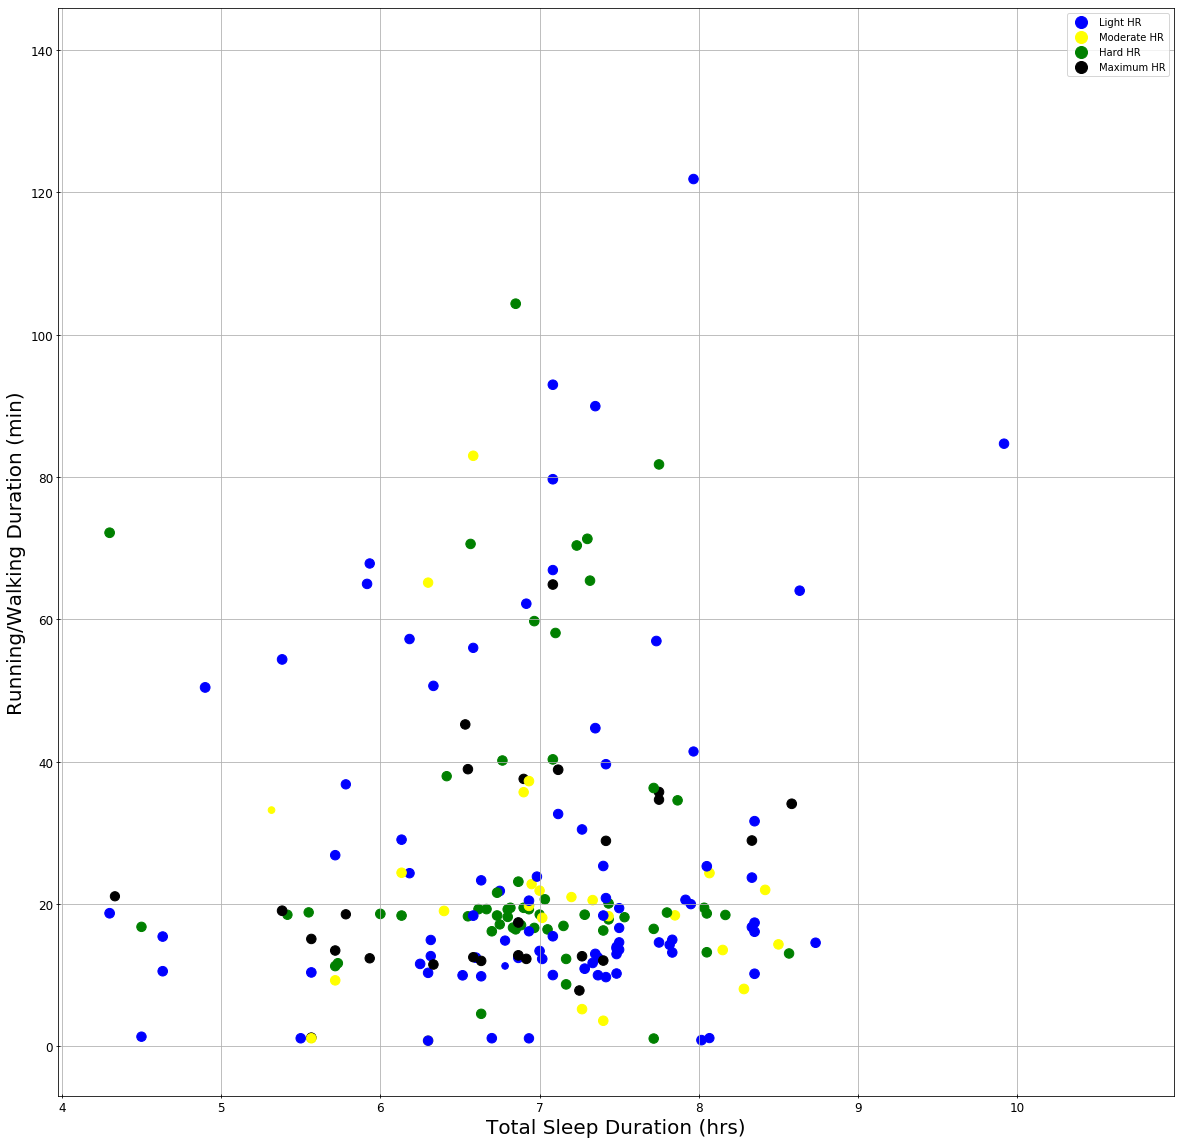

In [26]:
## Colour = Heart Zone
## Size = Sleep Efficiency
## X = Sleep duration
## Y = Exercise duration

## Tracking sleep records > 4hrs
atheletics_sleep = atheletics_sleep[atheletics_sleep["prev_total_sleep_duration"]/60000 > 240]
atheletics_sleep = atheletics_sleep[atheletics_sleep["duration"] > 0]
colour_chart = {"Light HR": "blue", "Moderate HR": "yellow", "Hard HR": "green", "Maximum HR": "black"}

fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(x=atheletics_sleep["prev_total_sleep_duration"]/(1000*60*60),
           y=atheletics_sleep["duration"]/60000,
           s=atheletics_sleep["prev_sleep_efficiency"]*1,
           marker="o",
           c=atheletics_sleep["heart_zone"].apply(lambda hz_val: colour_chart[hz_val]))

ax.set_xlabel("Total Sleep Duration (hrs)", fontsize=20)
ax.set_ylabel("Running/Walking Duration (min)", fontsize=20)
#fig.suptitle("Total Sleep Duration vs Exercise Duration", fontsize=30)

plt.tick_params(axis="both", labelsize=12, direction="inout", colors="black")

markers = [plt.Line2D([0,0],[0,0], color=color, marker="o", linestyle="", markersize=12) 
           for color in colour_chart.values()]

plt.legend(markers, colour_chart.keys(), numpoints=1)

plt.grid(b=True, axis="both", which="major")
plt.show()

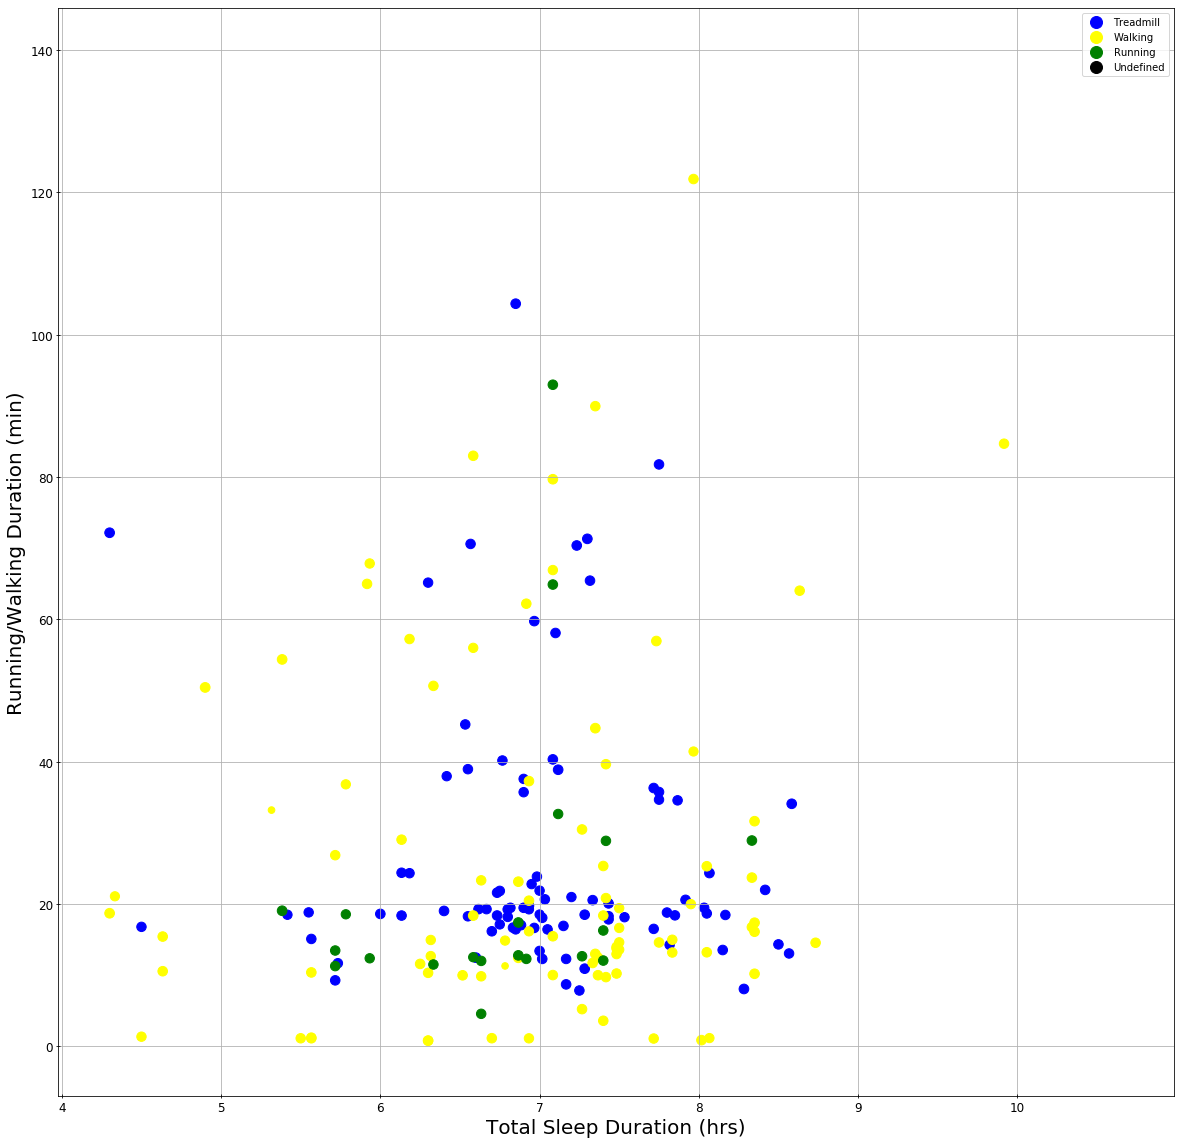

In [27]:
## Colour = exercise Type
## Size = Sleep Efficiency
## X = Sleep duration
## Y = Exercise duration

## Tracking sleep records > 4hrs
atheletics_sleep = atheletics_sleep[atheletics_sleep["prev_total_sleep_duration"]/60000 > 240]
atheletics_sleep = atheletics_sleep[atheletics_sleep["duration"] > 0]
colour_chart = {"Treadmill": "blue", "Walking": "yellow", "Running": "green", "Undefined": "black"}

fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(x=atheletics_sleep["prev_total_sleep_duration"]/(1000*60*60),
           y=atheletics_sleep["duration"]/60000,
           s=atheletics_sleep["prev_sleep_efficiency"]*1,
           marker="o",
           c=atheletics_sleep["ex_name"].apply(lambda hz_val: colour_chart[hz_val]))

ax.set_xlabel("Total Sleep Duration (hrs)", fontsize=20)
ax.set_ylabel("Running/Walking Duration (min)", fontsize=20)
#fig.suptitle("Total Sleep Duration vs Exercise Duration", fontsize=30)

plt.tick_params(axis="both", labelsize=12, direction="inout", colors="black")

markers = [plt.Line2D([0,0],[0,0], color=color, marker="o", linestyle="", markersize=12) 
           for color in colour_chart.values()]

plt.legend(markers, colour_chart.keys(), numpoints=1)

plt.grid(b=True, axis="both", which="major")
plt.show()

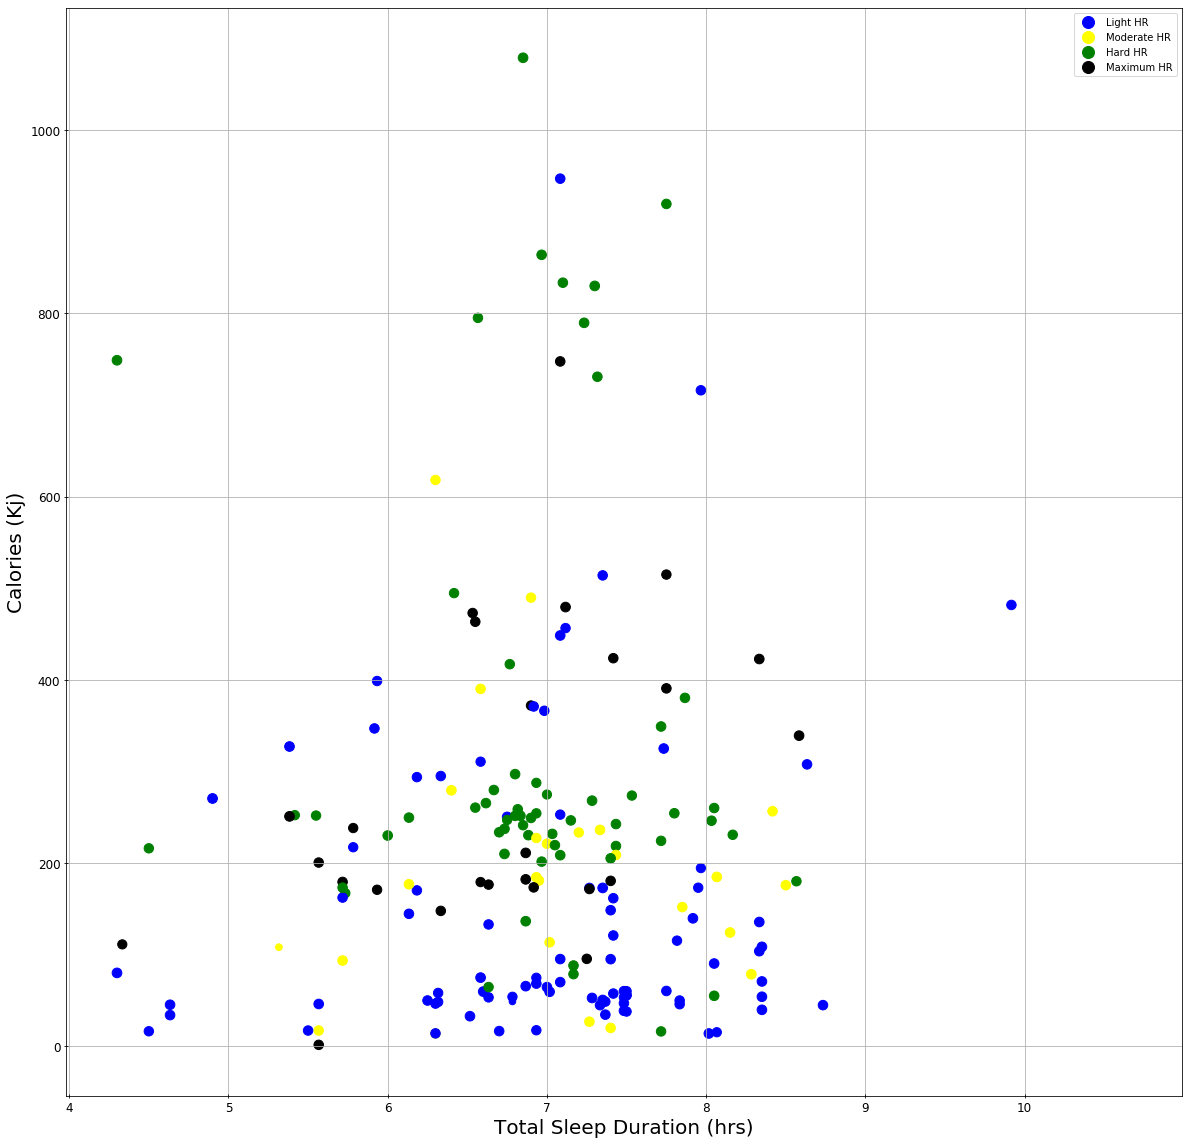

In [28]:
## Colour = Heart Zone
## Size = Sleep Efficiency
## X = Sleep duration
## Y = Calories

## Tracking sleep records > 4hrs
atheletics_sleep = atheletics_sleep[atheletics_sleep["prev_total_sleep_duration"]/60000 > 240]
atheletics_sleep = atheletics_sleep[atheletics_sleep["duration"] > 0]
colour_chart = {"Light HR": "blue", "Moderate HR": "yellow", "Hard HR": "green", "Maximum HR": "black"}

fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(x=atheletics_sleep["prev_total_sleep_duration"]/(1000*60*60),
           y=atheletics_sleep["calorie"],
           s=atheletics_sleep["prev_sleep_efficiency"]*1,
           marker="o",
           c=atheletics_sleep["heart_zone"].apply(lambda hz_val: colour_chart[hz_val]))

ax.set_xlabel("Total Sleep Duration (hrs)", fontsize=20)
ax.set_ylabel("Calories (Kj)", fontsize=20)
#fig.suptitle("Total Sleep Duration vs Exercise Duration", fontsize=30)

plt.tick_params(axis="both", labelsize=12, direction="inout", colors="black")

markers = [plt.Line2D([0,0],[0,0], color=color, marker="o", linestyle="", markersize=12) 
           for color in colour_chart.values()]

plt.legend(markers, colour_chart.keys(), numpoints=1)

plt.grid(b=True, axis="both", which="major")
plt.show()

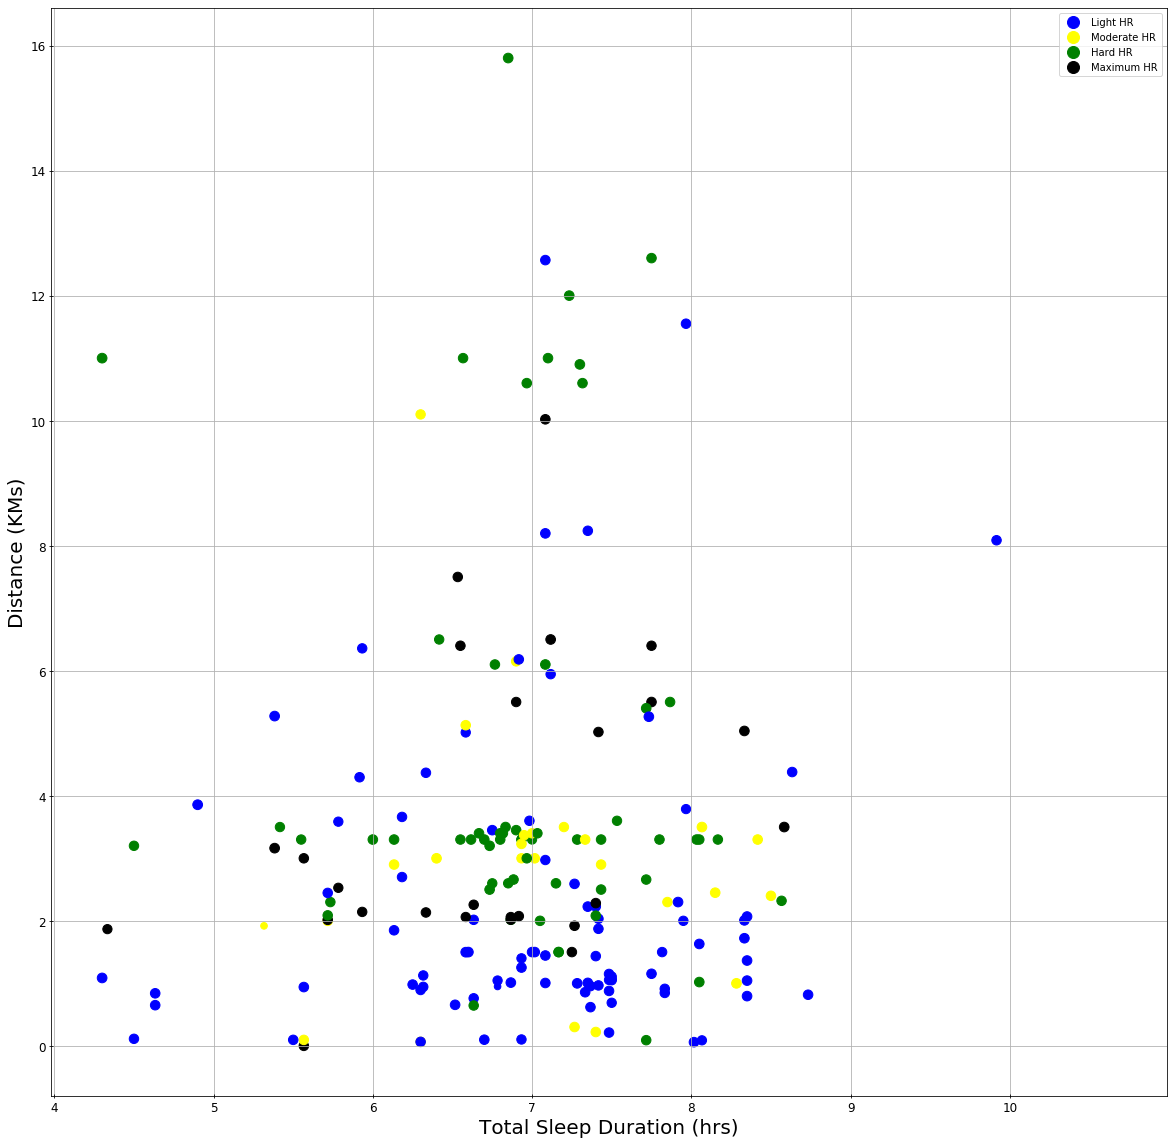

In [29]:
## Colour = Heart Zone
## Size = Sleep Efficiency
## X = Sleep duration
## Y = Kms and Kms

## Tracking sleep records > 4hrs
atheletics_sleep = atheletics_sleep[atheletics_sleep["prev_total_sleep_duration"]/60000 > 240]
atheletics_sleep = atheletics_sleep[atheletics_sleep["duration"] > 0]
colour_chart = {"Light HR": "blue", "Moderate HR": "yellow", "Hard HR": "green", "Maximum HR": "black"}

fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(x=atheletics_sleep["prev_total_sleep_duration"]/(1000*60*60),
           y=atheletics_sleep["distance"]/1000,
           s=atheletics_sleep["prev_sleep_efficiency"]*1,
           marker="o",
           c=atheletics_sleep["heart_zone"].apply(lambda hz_val: colour_chart[hz_val]))

ax.set_xlabel("Total Sleep Duration (hrs)", fontsize=20)
ax.set_ylabel("Distance (KMs)", fontsize=20)
#fig.suptitle("Total Sleep Duration vs Exercise Duration", fontsize=30)

plt.tick_params(axis="both", labelsize=12, direction="inout", colors="black")

markers = [plt.Line2D([0,0],[0,0], color=color, marker="o", linestyle="", markersize=12) 
           for color in colour_chart.values()]

plt.legend(markers, colour_chart.keys(), numpoints=1)

plt.grid(b=True, axis="both", which="major")
plt.show()

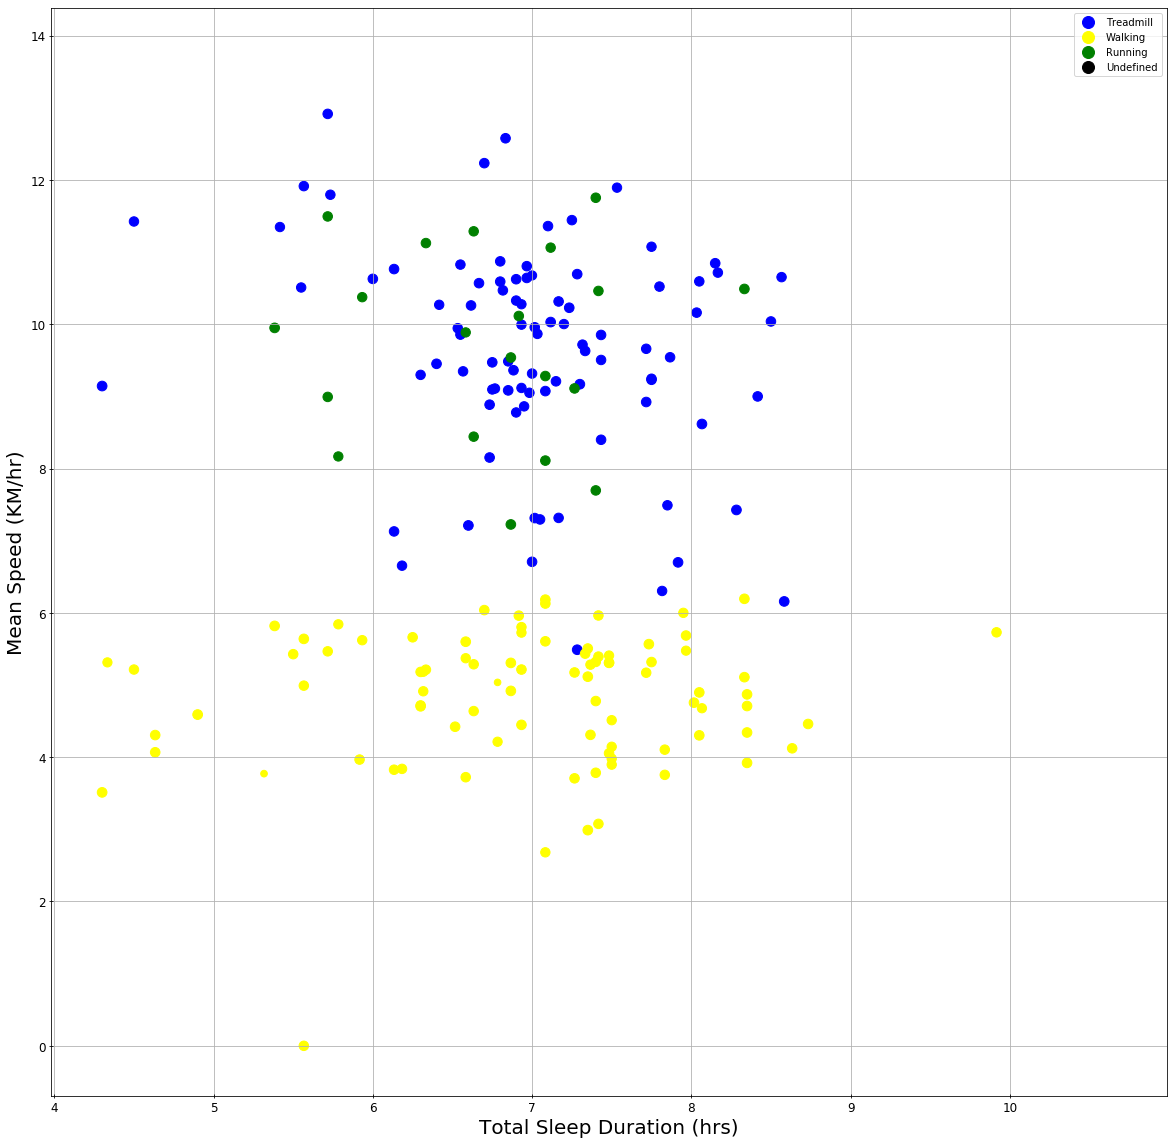

In [30]:
## Colour = Exercise type
## Size = Sleep Efficiency
## X = Sleep duration
## Y = Mean speed

## Tracking sleep records > 4hrs
atheletics_sleep = atheletics_sleep[atheletics_sleep["prev_total_sleep_duration"]/60000 > 240]
atheletics_sleep = atheletics_sleep[atheletics_sleep["duration"] > 0]
colour_chart = {"Treadmill": "blue", "Walking": "yellow", "Running": "green", "Undefined": "black"}

fig, ax = plt.subplots(figsize=(20,20))

ax.scatter(x=atheletics_sleep["prev_total_sleep_duration"]/(1000*60*60),
           y=atheletics_sleep["mean_speed"]*3.6,
           s=atheletics_sleep["prev_sleep_efficiency"]*1,
           marker="o",
           c=atheletics_sleep["ex_name"].apply(lambda hz_val: colour_chart[hz_val]))

ax.set_xlabel("Total Sleep Duration (hrs)", fontsize=20)
ax.set_ylabel("Mean Speed (KM/hr)", fontsize=20)
#fig.suptitle("Total Sleep Duration vs Exercise Duration", fontsize=30)

plt.tick_params(axis="both", labelsize=12, direction="inout", colors="black")

markers = [plt.Line2D([0,0],[0,0], color=color, marker="o", linestyle="", markersize=12) 
           for color in colour_chart.values()]

plt.legend(markers, colour_chart.keys(), numpoints=1)

plt.grid(b=True, axis="both", which="major")
plt.show()

In [31]:
## Sleep patterns after atheletics

atheletics_sleep.insert(loc=len(atheletics_sleep.columns), column="next_total_sleep_duration", value=0.0)
atheletics_sleep.insert(loc=len(atheletics_sleep.columns), column="next_motionless_sleep_duration", value=0.0)
atheletics_sleep.insert(loc=len(atheletics_sleep.columns), column="next_sleep_efficiency", value=0.0)

atheletics_sleep.columns

Index(['calorie', 'distance', 'duration', 'exercise_type', 'location_data',
       'max_heart_rate', 'max_speed', 'mean_heart_rate', 'mean_speed',
       'milestone', 'milestone_time', 'min_heart_rate', 'start_time',
       'prev_motionless_sleep_duration', 'prev_total_sleep_duration',
       'prev_sleep_efficiency', 'heart_zone', 'ex_name',
       'next_total_sleep_duration', 'next_motionless_sleep_duration',
       'next_sleep_efficiency'],
      dtype='object')

In [46]:
for ind, row in atheletics_sleep.iterrows():
    ex_date = pd.to_datetime(row["start_time"])
    ex_day  = ex_date.date()
    ex_time = ex_date.time()
    
    for (dni, wor) in sleep_data.iterrows():
        sleep_date = pd.to_datetime(wor["sleep_start_time"])
        sleep_day  = sleep_date.date()
        sleep_time = sleep_date.time()
        
        if (ex_day == sleep_day):
            if (sleep_time > ex_time):
                ## Found a sleep record for same day as the exercise day and sleep time later than exercise time
                
                print (sleep_time, ex_time)
                print (sleep_day, ex_day)
                break
    break
        
    

23:21:00 13:43:35.503000
2017-10-17 2017-10-17
